In [1]:
# load the necessary packages  
import time
start_time = time.time()  
import datetime
import random
import numpy as np    
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn import preprocessing 
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
import scipy.stats as stats 
from scipy.stats import zscore 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe  
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import Normalizer   
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
xgb.set_config (verbosity=0)
from xgboost import XGBClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn import svm 
import statsmodels.formula.api as sm
import math 
from collections import Counter
random_state = np.random.RandomState(0) 
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample 
from numpy import array
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import binarize 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from scipy.stats import randint as sp_randint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
import joblib
import os
import warnings 
warnings.filterwarnings('ignore')
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import six
from tabulate import tabulate
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from google_trans_new import google_translator
from translate import Translator

In [2]:
# PROJECT OBJECTIVE: 
# We will build a recommendation system using popularity based and collaborative filtering methods to recommend
# mobile phones to a user which are most popular and personalised respectively.

In [3]:
# Q 1(A) 
# Merge all the provided CSVs into one dataFrame.

In [4]:
# Solution 
review_1 = pd.read_csv('phone_user_review_file_1.csv',encoding='iso-8859-1')
review_2 = pd.read_csv('phone_user_review_file_2.csv',encoding='iso-8859-1')
review_3 = pd.read_csv('phone_user_review_file_3.csv',encoding='iso-8859-1')
review_4 = pd.read_csv('phone_user_review_file_4.csv',encoding='iso-8859-1')
review_5 = pd.read_csv('phone_user_review_file_5.csv',encoding='iso-8859-1')
review_6 = pd.read_csv('phone_user_review_file_6.csv',encoding='iso-8859-1')

In [5]:
print('Detecting whether the column names are same in all the dataframes: ')
all(np.unique(review_1.columns.tolist()) == np.unique(review_1.columns.tolist()+
                                                      review_2.columns.tolist()+
                                                      review_3.columns.tolist()+
                                                      review_4.columns.tolist()+
                                                      review_5.columns.tolist()+
                                                      review_6.columns.tolist()))

Detecting whether the column names are same in all the dataframes: 


True

In [6]:
Review = review_1.copy()
Review = Review.append(review_2)
Review = Review.append(review_3)
Review = Review.append(review_4)
Review = Review.append(review_5)
Review = Review.append(review_6)
Review.index = np.arange(0,len(Review))
Review.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [7]:
Review.shape

(1415133, 11)

In [8]:
# Q 1(B) 
# Explore, understand the Data and share at least 2 observations.

In [9]:
# Basic information about the dataset
Review.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [10]:
# Computing the number/percentage of null values in the features 
Review = Review.replace(r'^\s*$', np.nan, regex=True)
Missing = Review.isna().sum()
Missing_Percentage = (Missing*100/Review.shape[0]).round(2)
print('Null values and percentages of null values for each feature are:\n',Missing.astype('str') 
      +'('+ Missing_Percentage.astype('str')+'%)')

Null values and percentages of null values for each feature are:
 phone_url         0(0.0%)
date              0(0.0%)
lang              0(0.0%)
country           0(0.0%)
source            0(0.0%)
domain            0(0.0%)
score        63489(4.49%)
score_max    63489(4.49%)
extract      19361(1.37%)
author       63202(4.47%)
product           1(0.0%)
dtype: object


In [11]:
# Observations: 
# Detected null values in 5 features of the dataset viz, score, score_max, extract, author and product.  
# The proportion of null values in score, score_max and author is approximately 4.50%.  
# Barring score and score_max, all the other features of the dataset are of Object type.   

In [12]:
items = Review['product'].value_counts()[:5] # Top 5 items 
print('Distribution of number of ratings per item (restricted to 5): \n',items)

Distribution of number of ratings per item (restricted to 5): 
 Lenovo Vibe K4 Note (White,16GB)     5226
Lenovo Vibe K4 Note (Black, 16GB)    4390
OnePlus 3 (Graphite, 64 GB)          4103
OnePlus 3 (Soft Gold, 64 GB)         3563
Huawei P8lite zwart / 16 GB          2707
Name: product, dtype: int64


In [13]:
users = Review['author'].value_counts(dropna=False)[:5] # Top user 
print('Distribution of number of active users (restricted to 5): \n',users)
users.index = users.index.map(str) 

Distribution of number of active users (restricted to 5): 
 Amazon Customer    76978
NaN                63202
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Name: author, dtype: int64


In [14]:
# Observations: 
# 1. The phone with the maximum number of ratings is Lenovo Vibe K4 Note (White,16GB) 
# 2. The most active user is Amazon Customer. However we found other users named Cliente Amazon,Client d'Amazon in top 5. 
# This indicates that they are customers in Amazon. 

In [15]:
# Finding unique values in each feature
print('Number of Unique values in each feature:\n',Review.nunique())

Number of Unique values in each feature:
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


In [16]:
# The score_max is always 10 hence, the number of unique values for this feature is 1

In [17]:
# Q 1(C) 
# Round off scores to the nearest integers.

In [18]:
# Solution 
Review ['score'] = Review ['score'].round(0).astype('Int64')

In [19]:
Review.score.unique()

<IntegerArray>
[10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]
Length: 12, dtype: Int64

In [20]:
# Q 1(D) 
# Check for missing values. Impute the missing values, if any.

In [21]:
# Solution 
Review = Review.replace(r'^\s*$', np.nan, regex=True)
Review.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [22]:
# Median of 'score' feature 
Review['score'].median()

9.0

In [23]:
# Imputation of Missing Values in 'score' feature by Median 
Review['score'] = Review['score'].fillna(Review['score'].median())

In [24]:
Review['score'].median()

9.0

In [25]:
# Median of 'score' feature pre and post imputation is same.   

In [26]:
# Upon close inspection of the dataset, we discovered the presence of some authors without names. They were presented in 
# the dataset by 'Anonymous' and 'unknown'. 
# We will replace the 'unknown' values by 'Anonymous' and drop it from the 'author' feature. 
# Also, we will drop the missing values across all features. 

In [27]:
unknowns = ['Anonymous', 'unknown']
Review['author'].replace(to_replace = unknowns, value = 'Anonymous', inplace=True)
Review = Review[Review["author"] != 'Anonymous']

In [28]:
Review = Review.dropna()

In [29]:
Review.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [30]:
# Majority of the features are redundant hence, can be dropped in later course. 

In [31]:
# Q 1(E)
# Check for duplicate values and remove them, if any.

In [32]:
# Solution
duplicate = Review.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 4473


In [33]:
Review = Review.drop_duplicates() 

In [34]:
Review.shape

(1267105, 11)

In [35]:
# Q 1(F)
# Keep only 1 Million data samples. Use random state=612.

In [36]:
# Solution
Review = Review.sample(n = 1000000, random_state = 612)

In [37]:
Review.shape

(1000000, 11)

In [38]:
# Q 1(G)
# Drop irrelevant features. Keep features like Author, Product, and Score.

In [39]:
Review = Review.drop(['phone_url','date','lang','country','source','domain','score_max','extract'],axis=1)

In [40]:
Review.shape 

(1000000, 3)

In [41]:
Review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1104823 to 778321
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   score    1000000 non-null  Int64 
 1   author   1000000 non-null  object
 2   product  1000000 non-null  object
dtypes: Int64(1), object(2)
memory usage: 31.5+ MB


In [42]:
# Q 2(A)
# Identify the most rated products.

In [43]:
# Solution
Review.groupby('product')['score'].count().sort_values(ascending=False).head()  

product
Lenovo Vibe K4 Note (White,16GB)     4115
Lenovo Vibe K4 Note (Black, 16GB)    3465
OnePlus 3 (Graphite, 64 GB)          3218
OnePlus 3 (Soft Gold, 64 GB)         2800
Huawei P8lite zwart / 16 GB          2132
Name: score, dtype: int64

In [44]:
# Q 2(B)
# Identify the users with most number of reviews.

In [45]:
# Solution
Review['author'].value_counts().head()

Amazon Customer    60553
Cliente Amazon     15150
e-bit               6569
Client d'Amazon     6082
Amazon Kunde        3733
Name: author, dtype: int64

In [46]:
# Q 2(C)
# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. 
# Report the shape of the final dataset

In [47]:
# Solution
Product_50 = Review ['product'].value_counts()
Product_50 

Lenovo Vibe K4 Note (White,16GB)                                                                               4115
Lenovo Vibe K4 Note (Black, 16GB)                                                                              3465
OnePlus 3 (Graphite, 64 GB)                                                                                    3218
OnePlus 3 (Soft Gold, 64 GB)                                                                                   2800
Huawei P8lite zwart / 16 GB                                                                                    2132
                                                                                                               ... 
Smartphone Motorola Z6                                                                                            1
Sony Ericsson W350 Walkman                                                                                        1
Samsung i9100 Galaxy S II Swarowski Crystal Edition ohne Vertrag ceramic

In [48]:
# Products having more than 50 ratings
Product_50_Count =  Product_50[Product_50 > 50].index.tolist()
print('Number of products with more than 50 ratings: ', len(Product_50_Count))

Number of products with more than 50 ratings:  4491


In [49]:
Author_50 = Review ['author'].value_counts()
Author_50 

Amazon Customer          60553
Cliente Amazon           15150
e-bit                     6569
Client d'Amazon           6082
Amazon Kunde              3733
                         ...  
Poupina                      1
Sven Bogdahn                 1
chry                         1
Amilew                       1
Elena Mariel Gonzalez        1
Name: author, Length: 628252, dtype: int64

In [50]:
# Authors/Users who have given more than 50 ratings.
Author_50_Count =  Author_50[Author_50 > 50].index.tolist()
print('Authors/Users who have given more than 50 rating: ', len(Author_50_Count))

Authors/Users who have given more than 50 rating:  630


In [51]:
# Q3
# Build a popularity based model and recommend top 5 mobile phones

In [52]:
# Solution
def popularity_recommendation(Data):
    ratings_mean_count = pd.DataFrame(Data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = Data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Recommendations for Top 5 mobile phones are: \n')
    display(ratings_mean_count.head())
    return

In [53]:
# Using dataset of phones with > 50 ratings and users who gave > 50 ratings.
Data = Review[(Review['author'].isin(Author_50_Count)) & (Review['product'].isin(Product_50_Count))]

In [54]:
popularity_recommendation(Data)

Recommendations for Top 5 mobile phones are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,60
"HTC ONE M8 5"" 16GB 4G LTE ANDROID 4.4 EUROPA GRAY",10.0,14
Samsung Galaxy S7 Edge 32Gb,10.0,13
Sim Free Samsung Galaxy S7 Mobile Phone - Black,10.0,12
Sprint Samsung Galaxy S5 White 16GB (Sprint Prepaid),10.0,12


In [55]:
# Q4
# Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch. 
# Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [56]:
# Solution 
from surprise import Dataset,Reader
from surprise import NormalPredictor

In [57]:
reader = Reader(rating_scale=(1, 10))
Data_New = Dataset.load_from_df(Data[['author','product','score']], reader)

In [58]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(Data_New, test_size=.25, random_state=123)

In [59]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy
svd_model = SVD(n_factors=10, biased=False, random_state=7)
svd_model.fit(trainset)

In [60]:
testset[0]

('e-bit', 'Smartphone LG L90 D410', 10.0)

In [61]:
# KNN with Means (User Based)
from surprise import KNNWithMeans
algo_user = KNNWithMeans(k=900, sim_options={'name': 'pearson_baseline','user_based': True}, verbose=True)
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [62]:
testset[0]

('e-bit', 'Smartphone LG L90 D410', 10.0)

In [63]:
# KNN with Means (Item Based)
algo_item = KNNWithMeans(k=900, sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=True)
algo_item.fit(trainset) 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [64]:
testset[0]

('e-bit', 'Smartphone LG L90 D410', 10.0)

In [65]:
# Q5
# Evaluate the collaborative model. Print RMSE value.

In [66]:
# RMSE of SVD model 
SVD_pred = svd_model.test(testset)
RMSE_SVD = round(accuracy.rmse(SVD_pred),4)
RMSE_SVD

RMSE: 2.7847


2.7847

In [67]:
# RMSE of KNNWithMeans (User based)
KNN_User_pred = algo_user.test(testset)
RMSE_KNN_User = round(accuracy.rmse(KNN_User_pred),4)
RMSE_KNN_User

RMSE: 2.8265


2.8265

In [68]:
# RMSE of KNNWithMeans (Item based)
KNN_Item_pred = algo_item.test(testset)
RMSE_KNN_Item = round(accuracy.rmse(KNN_Item_pred),4) 
RMSE_KNN_Item

RMSE: 2.7674


2.7674

<AxesSubplot:>

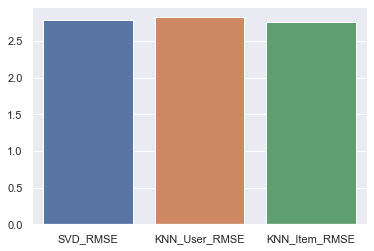

In [69]:
# Pictorial representation of RMSE of different Collaborative algorithms 
sns.barplot(x=['SVD_RMSE','KNN_User_RMSE','KNN_Item_RMSE'],y=[RMSE_SVD, RMSE_KNN_User, RMSE_KNN_Item])

In [70]:
# Observation:  
# Of the three Collaborative algorithms, KNNWithMeans (Item based) has the lowest Root Mean Squared Error.  

In [71]:
# Q6
# Predict score (average rating) for test users.

In [72]:
# Solution
# Using Singular Value Decomposition model 
SVD_pred

[Prediction(uid='e-bit', iid='Smartphone LG L90 D410', r_ui=10.0, est=9.380553303877512, details={'was_impossible': False}),
 Prediction(uid='Peter', iid='Samsung Galaxy S4 Mini, Black 16GB (AT&T)', r_ui=10.0, est=8.822474966546359, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold)', r_ui=10.0, est=7.126931820407755, details={'was_impossible': False}),
 Prediction(uid='Antonio', iid='Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple', r_ui=10.0, est=9.845458571369747, details={'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Alcatel One Touch 20-04G Telefono Cellulare, Nero', r_ui=10.0, est=8.715823156153332, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Motorola Moto E 2Âª GeraÃ§Ã£o XT1506', r_ui=8.0, est=8.142621226702797, details={'was_impossible': False}),
 Prediction(uid='Cliente Am

In [73]:
SVD_pred_df = pd.DataFrame(SVD_pred, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
# Predicted Score (average rating) for test users
round(SVD_pred_df['est'].mean(),4)

7.7011

In [74]:
# Using K Nearest Neighbour With Means model (User based)
KNN_User_pred

[Prediction(uid='e-bit', iid='Smartphone LG L90 D410', r_ui=10.0, est=9.240740740740742, details={'actual_k': 108, 'was_impossible': False}),
 Prediction(uid='Peter', iid='Samsung Galaxy S4 Mini, Black 16GB (AT&T)', r_ui=10.0, est=9.527580772261624, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold)', r_ui=10.0, est=7.090909090909091, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid='Antonio', iid='Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple', r_ui=10.0, est=9.690037287261559, details={'actual_k': 23, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Alcatel One Touch 20-04G Telefono Cellulare, Nero', r_ui=10.0, est=8.684811954774622, details={'actual_k': 68, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Motorola Moto E 2Âª GeraÃ§Ã£o XT1506', r_ui=8.0, est=8.

In [75]:
KNN_User_pred_df = pd.DataFrame(KNN_User_pred, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
# Predicted Score (average rating) for test users
round(KNN_User_pred_df['est'].mean(),4)

7.7832

In [76]:
# Using K Nearest Neighbour With Means model (Item based)
KNN_Item_pred 

[Prediction(uid='e-bit', iid='Smartphone LG L90 D410', r_ui=10.0, est=9.241617628686392, details={'actual_k': 900, 'was_impossible': False}),
 Prediction(uid='Peter', iid='Samsung Galaxy S4 Mini, Black 16GB (AT&T)', r_ui=10.0, est=8.687861205130751, details={'actual_k': 27, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold)', r_ui=10.0, est=6.852638562457563, details={'actual_k': 900, 'was_impossible': False}),
 Prediction(uid='Antonio', iid='Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple', r_ui=10.0, est=9.49573030132416, details={'actual_k': 85, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Alcatel One Touch 20-04G Telefono Cellulare, Nero', r_ui=10.0, est=8.811782892270633, details={'actual_k': 900, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Motorola Moto E 2Âª GeraÃ§Ã£o XT1506', r_ui=8.0, est=

In [77]:
KNN_Item_pred_df = pd.DataFrame(KNN_Item_pred, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
# Predicted Score (average rating) for test users
round(KNN_Item_pred_df['est'].mean(),4)

7.777

In [78]:
# Q7
# Report your findings and inferences.

In [79]:
# Solution
# The average rating predicted by SVD model, K Nearest Neighbour With Means model (User based) and 
# K Nearest Neighbour With Means model (Item based) are almost similar. 
# If we round off the ratings to the nearest integer, all the 3 models predicted an average test users rating of 8.  
# Of the three Collaborative algorithms, KNNWithMeans (Item based) has the lowest Root Mean Squared Error.  

In [80]:
# Q8
# Try and recommend top 5 products for test users

In [81]:
from collections import defaultdict
# Objective: Generating top recommendations for each user in the test set 
def get_top_n(predictions, n=5):
    # Mapping the predictions to each user 
    top_n = defaultdict(list)
    for uid, iid, r_ui, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and exhibit the n highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [82]:
# Using Singular Value Decomposition model 
top_5 = get_top_n(SVD_pred,5)
top_5

defaultdict(list,
            {'e-bit': [('Apple iPhone 6 Plus 64GB', 9.684967165439378),
              ('Apple iPhone 6 16GB', 9.536438129271605),
              ('Apple iPhone 6 16GB', 9.536438129271605),
              ('Apple iPhone 6 16GB', 9.536438129271605),
              ('Apple iPhone 6 16GB', 9.536438129271605)],
             'Peter': [('Nokia 2720 Fold Sim Free Mobile Phone', 10),
              ('Apple iPhone 5C Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, iOS) Pink',
               10),
              ('Huawei Honor 8 Unlocked Smartphone 32 GB Dual Camera - US Warranty (Midnight Black)',
               10),
              ('Doro PhoneEasy 612i GSM Sim Free Mobile Phone - Aubergine',
               10),
              ('Samsung Galaxy Note N7000 Smartphone (13.5 cm (5.3 Zoll) HD Super AMOLED-Touchscreen, 8 MP Kamera, Android 2.3 OS) ceramic-white',
               10)],
             'Amazon Customer': [('Samsung Galaxy S III, Purple 16GB (Sprint)',
               10

In [83]:
# Using KNN with Means (User based)
top_5 = get_top_n(KNN_User_pred,5)
top_5

defaultdict(list,
            {'e-bit': [('Apple iPhone 6 Plus 64GB', 10),
              ('Apple iPhone 6 16GB', 9.812061159992611),
              ('Apple iPhone 6 16GB', 9.812061159992611),
              ('Apple iPhone 6 16GB', 9.812061159992611),
              ('Apple iPhone 6 16GB', 9.812061159992611)],
             'Peter': [('HTC One X 32GB Sim Free Smartphone - White', 10),
              ('Samsung E1200 Handy (3,9 cm (1,52 Zoll) Display, Dual-Band, Worterkennung) black',
               10),
              ('Nexus LG Nexus 5 UK Smartphone - White (16GB)', 10),
              ('Microsoft Lumia 640 UK SIM-free 5 inch Windows Smartphone - Orange',
               10),
              ('Apple iPhone 5C Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, iOS) Pink',
               10)],
             'Amazon Customer': [('Samsung Galaxy S5 black 16GB', 10),
              ('BlackBerry OEM Z10 Black Leather Swivel Holster', 10),
              ('Samsung E2121 SIM Free Mobile Phone', 10)

In [84]:
# Using KNN with Means (Item based)
top_5 = get_top_n(KNN_Item_pred,5)
top_5

defaultdict(list,
            {'e-bit': [('Apple iPhone 6 16GB', 9.763247976405337),
              ('Apple iPhone 6 16GB', 9.763247976405337),
              ('Apple iPhone 6 16GB', 9.763247976405337),
              ('Apple iPhone 6 16GB', 9.763247976405337),
              ('Apple iPhone 6 16GB', 9.763247976405337)],
             'Peter': [('Apple iPhone 5C Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, iOS) Pink',
               10),
              ('Huawei P9 grijs, zwart / 32 GB', 9.913485901578841),
              ('Samsung Galaxy Note N7000 Smartphone (13.5 cm (5.3 Zoll) HD Super AMOLED-Touchscreen, 8 MP Kamera, Android 2.3 OS) ceramic-white',
               9.76377583337937),
              ('Nokia Lumia 800 Cyan Blue', 9.623212720731399),
              ('Microsoft Nokia C2-00 Handy (Dual-Sim Handy, 4,6 cm (1,8 Zoll) Display, Bluetooth, MP3, E-Mail, VGA Kamera) schwarz',
               9.596837103373565)],
             'Amazon Customer': [("ZeroLemon [180 days warranty] 

In [85]:
# Q9
# Try other techniques (Example: cross validation) to get better results.

In [86]:
# Cross-validating for model evaluation 
from surprise.model_selection.validation import cross_validate
# Run 5-fold cross-validation on test data and print results

In [87]:
# SVD (Singular Value Decomposition) 
cross_validate(svd_model, Data_New, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7796  2.7685  2.7746  2.7769  2.8401  2.7879  0.0263  
MAE (testset)     2.1916  2.1879  2.1869  2.1872  2.2183  2.1944  0.0121  
Fit time          4.93    5.10    4.85    4.84    5.06    4.96    0.11    
Test time         0.74    1.13    0.70    0.72    0.71    0.80    0.16    


{'test_rmse': array([2.77962439, 2.76853123, 2.77456516, 2.77691392, 2.8400679 ]),
 'test_mae': array([2.19155374, 2.18790587, 2.18686568, 2.187247  , 2.21832794]),
 'fit_time': (4.929173231124878,
  5.1043829917907715,
  4.846063613891602,
  4.844290018081665,
  5.064605236053467),
 'test_time': (0.7363371849060059,
  1.12717866897583,
  0.7040903568267822,
  0.7167971134185791,
  0.7058854103088379)}

In [88]:
# KNN With Means (User Based)
cross_validate(algo_user, Data_New, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8149  2.8164  2.8256  2.8064  2.8119  2.8150  0.0063  
MAE (testset)     2.1755  2.1790  2.1836  2.1698  2.1766  2.1769  0.0045  
Fit time          6.38    6.59    6.74    6.96    6.74    6.68    0.19    
Test time         21.28   20.43   21.56   21.13   21

{'test_rmse': array([2.81492495, 2.81636611, 2.82562294, 2.80640936, 2.81187518]),
 'test_mae': array([2.1754589 , 2.17898996, 2.18357733, 2.16975473, 2.17658863]),
 'fit_time': (6.380827188491821,
  6.594562292098999,
  6.739450216293335,
  6.962956666946411,
  6.74364709854126),
 'test_time': (21.284382820129395,
  20.426611185073853,
  21.5635027885437,
  21.12550926208496,
  21.17229437828064)}

In [89]:
# KNN With Means (Item Based)
cross_validate(algo_item, Data_New, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7483  2.7651  2.7567  2.7709  2.7732  2.7629  0.0092  
MAE (testset)     2.1522  2.1573  2.1575  2.1664  2.1621  2.1591  0.0048  
Fit time          656.37  643.60  667.41  671.57  660.48  659.89  9.71    
Test time         884.94  892.82  899.22  971.00  89

{'test_rmse': array([2.74830477, 2.76507088, 2.75673867, 2.77094966, 2.77322196]),
 'test_mae': array([2.1522371 , 2.15731888, 2.15749283, 2.16644053, 2.16210431]),
 'fit_time': (656.3651192188263,
  643.6029465198517,
  667.4113917350769,
  671.573694229126,
  660.4834480285645),
 'test_time': (884.9357318878174,
  892.8236916065216,
  899.2171926498413,
  970.9981596469879,
  897.736989736557)}

In [90]:
# Observation 
# Cross-validation with 5 folds shows that the mean SSE (testset) is lowest in the case of KNN With Means (Item Based).

In [91]:
# Q10
# In what business scenario you should use popularity based Recommendation Systems

In [92]:
# Solution
# Popularity based recommendation systems work on the principle of popularity (frequency counts) or anything which is 
# trending. It is not a personalised recommendation system. 
# Recommendation engines like Collaborative filtering based recommenders suffer from cold start problems. 
# Cold start problems emanate due to a lack of interraction between the items and the users.  
# Popularity based recommendation systems, on the contrary, does not suffer from cold start problems. 
# Therefore, any business when faced with cold start problems, can employ Popularity based recommendation engines. 
# For instance, when a new user visits an online market place, he can be recommended the most popular items on the site. 
# Case: 
# Sites like IMDB and Rotten Tomatoes maintain list of most popular movies based on ratings. 
# This helps in creating a scalable recommendation engine which in turn helps in augmenting user engagement. 

In [93]:
# Q11
# In what business scenario you should use CF based Recommendation Systems

In [94]:
# Solution 
# Collaborative Filtering based recommenders work on the similarity between different users and items.  
# CF based recommenders helps in generating personalised product recommendations. 
# Types
# There are 2 types of neighbourhood-based CF algorithms viz User-User CF and Item-Item CF.
# In the case of User-User CF, recommendation is based on the preferences of similar users. 
# In the case of Item-Item CF, recommendation is based on the similarity between items computed using users' ratings of them.
# As per Wikipedia, Item-Item CF is analogous to "people who rate item X highly, like you, also tend to rate item Y highly, 
# and you haven't rated item Y yet, so you should try it."
# Besides neighbourhood-based CF algorithms, CF based recommenders use another approach called Latent Factor methods.  
# Latent Factor methods like matrix factorisation helps in identifying latent (hidden) features from the 
# inputs (user and item).  
# Case:
# Amazon uses Item based CF recommenders to recommend products to its users. Mckinsey estimated 35% of purchases on Amazon 
# is attributable to its robust recommendation engines. 
# Netflix uses collaborative filtering based recommenders to recommend movies. Mckinsey estimated that 75% of Netflix 
# viewing is driven by recommendations. 
# Spotify user CF based recommenders to recommend songs to its users. 

In [95]:
# Q12
# What other possible methods can you think of which can further improve the recommendation for different users? 

In [96]:
# Solution 
# Besides Popularity based recommenders and Collaborative Filtering based recommenders, we can use 
# Market basket/Apriori based algorithm commonly used in shopping behaviour analysis which in turn can be used in
# targeted marketing campaigns.  
# Hybrid recommendation engines which employs a mix of content based approach and collaborative filtering approaches.
# Content based recommenders can help solve Cold Start and Gray Sheep problems. 
# A common industry practice is to use Latent Factor models for high level recommendation and then improving them using 
# content based recommenders by using information on users or items.  
# For instance, LinkedIn uses both collaborative filter based recommenders and content based recommenders to build its
# “companies you may want to follow” feature.  
# Deep learning based collaborative filtering which learns the user and item embeddings (latent feature vectors) 
# based on user and item interactions with a neural network. 